# Feature Engineering and Exploratory Data Analysis

## Import Necessary Libraries

In [2]:
# libraries required are imported
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from random import sample
import warnings # alert the user of some condition in program
warnings.filterwarnings('ignore') # There is warning if there are some absolete of
                                  # certain programming elements such as keywords or class, etc

In [3]:
# To see all the columns of dataset
pd.set_option('display.max_columns', 50)

## Dataset 

| VARIABLE NAME  | DESCRIPTION                                      |
| :--------------| :------------------------------------------------|
| a              | semi-major axis[au]                              |
| e              | eccentricity                                     |
| i              | inclination wrt x-y ecliptic plane [deg]         |
| om             | longitude of the ascending node                  |
| w              | argument of perihelion                           |
| q              | perihelion distance [au]                         |
| ad             | aphelion distance [au]                           |
| per_y          | orbital period [years]                           |
| data_arc       | data arc-span [d]                                |
| condition_code | orbit condition code                             |
| n_obs_use      | number of observations used                      |
| H              | absolute magnitude parameter                     |
| diameter       | diameter of asteroid [km]                        |
| extent         | object bi or tri-axial ellipsoid dimensions [km] |
| albedo         | geometric albedo                                 |
| rot_per        | standard gravitational parameter [$m \times G$]  |
| bv             | color index B-V magnitude difference             |
| ub             | color index U-B magnitude difference             |
| IR             | color index I-R magnitude difference             |
| spec_B         | spectral taxonomic type (SMASSII)                |
| spec_T         | spectral taxonomic type (Tholen)                 |
| neo            | near earth object                                |
| pha            | physically hazardous asteroid                    |
| moid           | earth minimum orbit intersection distance [au]   |

### Import Dataset 

In [4]:
# Read the dataset and as columns have mixed datatype so using "low_memory = False"
dataset = pd.read_csv('Asteroid_Updated.csv', low_memory = False)
print(dataset)

           name         a         e          i          om           w  \
0         Ceres  2.769165  0.076009  10.594067   80.305532   73.597694   
1        Pallas  2.772466  0.230337  34.836234  173.080063  310.048857   
2          Juno  2.669150  0.256942  12.988919  169.852760  248.138626   
3         Vesta  2.361418  0.088721   7.141771  103.810804  150.728541   
4       Astraea  2.574249  0.191095   5.366988  141.576605  358.687607   
...         ...       ...       ...        ...         ...         ...   
839709      NaN  2.812945  0.664688   4.695700  183.310012  234.618352   
839710      NaN  2.645238  0.259376  12.574937    1.620020  339.568072   
839711      NaN  2.373137  0.202053   0.732484  176.499082  198.026527   
839712      NaN  2.260404  0.258348   9.661947  204.512448  148.496988   
839713      NaN  2.546442  0.287672   5.356238   70.709555  273.483265   

               q        ad     per_y  data_arc condition_code  n_obs_used  \
0       2.558684  2.979647  4.6082

In [5]:
# dataset.head() function prints/show the first 5 rows of dataset
dataset.head()

,name,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,neo,pha,diameter,extent,albedo,rot_per,GM,BV,UB,IR,spec_B,spec_T,G,moid,class,n,per,ma
0,Ceres,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,0,1002,3.34,N,N,939.4,964.4 x 964.2 x 891.8,0.0900,9.074170,62.6284,0.713,0.426,NaN,C,G,0.12,1.59478,MBA,0.213885,1683.145708,77.372096
1,Pallas,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,0,8490,4.13,N,N,545,582x556x500,0.1010,7.813200,14.3000,0.635,0.284,NaN,B,B,0.11,1.23324,MBA,0.213503,1686.155999,59.699133
2,Juno,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,0,7104,5.33,N,N,246.596,NaN,0.2140,7.210000,NaN,0.824,0.433,NaN,Sk,S,0.32,1.03454,MBA,0.226019,1592.787285,34.925016
3,Vesta,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,0,9325,3.20,N,N,525.4,572.6 x 557.2 x 446.4,0.4228,5.342128,17.8000,0.782,0.492,NaN,V,V,0.32,1.13948,MBA,0.271609,1325.432765,95.861936
4,Astraea,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,0,2916,6.85,N,N,106.699,NaN,0.2740,16.806000,NaN,0.826,0.411,NaN,S,S,NaN,1.09589,MBA,0.238632,1508.600458,282.366289


In [6]:
# dataset.tail() function prints/show the last 5 rows of dataset
dataset.tail()

,name,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,neo,pha,diameter,extent,albedo,rot_per,GM,BV,UB,IR,spec_B,spec_T,G,moid,class,n,per,ma
839709,NaN,2.812945,0.664688,4.695700,183.310012,234.618352,0.943214,4.682676,4.717914,17298.0,0,118,20.400,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.032397,APO,0.208911,1723.217927,156.905910
839710,NaN,2.645238,0.259376,12.574937,1.620020,339.568072,1.959126,3.331350,4.302346,16.0,9,15,17.507,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.956145,MBA,0.229090,1571.431965,13.366251
839711,NaN,2.373137,0.202053,0.732484,176.499082,198.026527,1.893638,2.852636,3.655884,5.0,9,6,18.071,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.893896,MBA,0.269600,1335.311579,355.351127
839712,NaN,2.260404,0.258348,9.661947,204.512448,148.496988,1.676433,2.844376,3.398501,10.0,9,13,18.060,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.680220,MBA,0.290018,1241.302609,15.320134
839713,NaN,2.546442,0.287672,5.356238,70.709555,273.483265,1.813901,3.278983,4.063580,11.0,9,11,17.406,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.815280,MBA,0.242551,1484.222588,20.432959


In [7]:
# Shape of the dataset
print("Number of rows :-->", dataset.shape[0])
print("Number of columns :-->", dataset.shape[1])

Number of rows :--> 839714
Number of columns :--> 31


In [8]:
# Another way of printing shape of dataset
# dataset.shape() function prints the number of rows and columns
dataset.shape

(839714, 31)

Next step is to gather information about different columns in DataFrame. we can achive this by using dataset.info() function, which gives the information about the count of rows, columns, column datatype, memory usage   

In [9]:
# print a concise summary of DataFrame
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839714 entries, 0 to 839713
Data columns (total 31 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   name            21967 non-null   object 
 1   a               839712 non-null  float64
 2   e               839714 non-null  float64
 3   i               839714 non-null  float64
 4   om              839714 non-null  float64
 5   w               839714 non-null  float64
 6   q               839714 non-null  float64
 7   ad              839708 non-null  float64
 8   per_y           839713 non-null  float64
 9   data_arc        824240 non-null  float64
 10  condition_code  838847 non-null  object 
 11  n_obs_used      839714 non-null  int64  
 12  H               837025 non-null  float64
 13  neo             839708 non-null  object 
 14  pha             823272 non-null  object 
 15  diameter        137636 non-null  object 
 16  extent          18 non-null      object 
 17  albedo    

In [10]:
# print the name of columns
# from this we come to know what are the columns present in the used dataset
dataset.columns

Index(['name', 'a', 'e', 'i', 'om', 'w', 'q', 'ad', 'per_y', 'data_arc',
       'condition_code', 'n_obs_used', 'H', 'neo', 'pha', 'diameter', 'extent',
       'albedo', 'rot_per', 'GM', 'BV', 'UB', 'IR', 'spec_B', 'spec_T', 'G',
       'moid', 'class', 'n', 'per', 'ma'],
      dtype='object')

In [11]:
# Segregate/Separate the data into NUmeric and Categorical ones
categorical, numeric = [], []
for ele in dataset.columns:
    if dataset[ele].dtype == 'object':
        categorical.append(ele)
    else:
        numeric.append(ele)
print("Categorical Data : ", categorical)
print("Numeric Data : ", numeric)

Categorical Data :  ['name', 'condition_code', 'neo', 'pha', 'diameter', 'extent', 'spec_B', 'spec_T', 'class']
Numeric Data :  ['a', 'e', 'i', 'om', 'w', 'q', 'ad', 'per_y', 'data_arc', 'n_obs_used', 'H', 'albedo', 'rot_per', 'GM', 'BV', 'UB', 'IR', 'G', 'moid', 'n', 'per', 'ma']


In [12]:
# As diameter is not a categorical varible and is interpreted to be as an categorical so removing diameter from categorical array
categorical.remove('diameter')

In [13]:
#dataset.drop(['condition_code', 'neo', 'pha','n_obs_used', 'rot_per', 'GM', 'BV', 'UB', 'IR', 'G', 'data_arc', 'class', 'spec_B', 'spec_T'], axis = 1)

In [14]:
dataset.isna().sum()

name              817747
a                      2
e                      0
i                      0
om                     0
w                      0
q                      0
ad                     6
per_y                  1
data_arc           15474
condition_code       867
n_obs_used             0
H                   2689
neo                    6
pha                16442
diameter          702078
extent            839696
albedo            703305
rot_per           820918
GM                839700
BV                838693
UB                838735
IR                839713
spec_B            838048
spec_T            838734
G                 839595
moid               16442
class                  0
n                      2
per                    6
ma                     8
dtype: int64

## Feature Engineering and EDA 

### Univariate Feature Analysis

### For Numeric data

Finding the Mean, Standard Deviation, 25th percentile, 75th percentile, etc

Describing the data:

Here we use dataset.describe() function to get various summary statistics the excluedes NaN values.

this function also returns the count, mean, standard deviation, minimum and maximum values and the quantiles of the data

In [15]:
# Shows the Count, Mean, SD, 25th, 75th percentiles, minimum, maximum values
dataset.describe()

,a,e,i,om,w,q,ad,per_y,data_arc,n_obs_used,H,albedo,rot_per,GM,BV,UB,IR,G,moid,n,per,ma
count,839712.000000,839714.000000,839714.000000,839714.000000,839714.000000,839714.000000,839708.000000,839713.000000,824240.000000,839714.000000,837025.000000,136409.000000,18796.000000,1.400000e+01,1021.000000,979.000000,1.00,119.000000,8.232720e+05,8.397120e+05,8.397080e+05,839706.000000
mean,2.757514,0.155636,8.949826,168.499466,181.075796,2.404728,3.385710,6.859734,5688.422331,259.191837,16.786249,0.130067,21.136772,7.821928e+00,0.769212,0.364396,-0.33,0.178739,1.423371e+00,2.374145e-01,2.505533e+03,180.659892
std,114.384959,0.093897,6.666087,103.096307,104.023854,2.233172,12.748733,252.264249,4208.177231,371.759667,1.821574,0.109994,73.131751,1.678880e+01,0.088625,0.095780,NaN,0.134603,2.250450e+00,8.095014e-02,9.213979e+04,106.562235
min,-104279.220927,0.000000,0.007546,0.000388,0.001666,0.070511,0.773684,0.000000,0.000000,2.000000,-1.100000,0.001000,0.004389,2.100000e-09,0.580000,0.120000,-0.33,-0.250000,3.437640e-07,2.926897e-08,1.511339e+02,-67.136826
25%,2.385258,0.091454,4.069077,80.211400,91.041603,1.971941,2.775350,3.683928,3608.000000,50.000000,15.900000,0.053000,4.210000,1.022225e-03,0.700000,0.289000,-0.33,0.100000,9.784998e-01,1.900553e-01,1.345555e+03,86.642618
50%,2.644219,0.143655,7.257101,160.294860,181.669478,2.225510,3.037761,4.299859,5806.000000,118.000000,16.800000,0.078000,6.653000,6.192500e-01,0.743000,0.360000,-0.33,0.190000,1.237810e+00,2.292228e-01,1.570524e+03,181.517775
75%,2.996048,0.199400,12.255653,252.201519,271.521717,2.578162,3.357967,5.185985,7270.000000,296.000000,17.600000,0.188000,12.624250,6.500000e+00,0.850000,0.439000,-0.33,0.250000,1.590560e+00,2.675475e-01,1.894184e+03,274.301731
max,3043.149073,1.201134,175.188725,359.999800,359.999833,80.424175,6081.841956,167877.712688,72684.000000,9325.000000,33.200000,1.000000,3240.000000,6.262840e+01,1.077000,0.655000,-0.33,0.600000,7.950130e+01,2.381994e+00,6.131733e+07,491.618014


## For Categorical Data

Made a frequency graph of variables and colcluded its outcome.

The method .value_counts() in code below returns the frequency distribution of each category in the feature and then selects the top category, which is the mode, with the .index attribute.

The plot below is a barplot of the frequency distribution of a categorical feature using the seaborn package which shows the frequency distribution of the 'condtion_code' column.

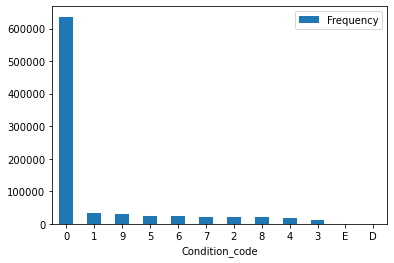

In [16]:
# value_counts :--> returns the count of unique items in s pandas dataframe
# "condition_code" is a categorical feature with values 1,2,3,4,5,6,7,8,9,E,D
condition_code = dataset['condition_code'].value_counts()
condition_code = pd.DataFrame({"Frequency":condition_code})
condition_code['Condition_code'] = condition_code.index
condition_code.plot.bar(x='Condition_code', y='Frequency', rot=0)
plt.show()

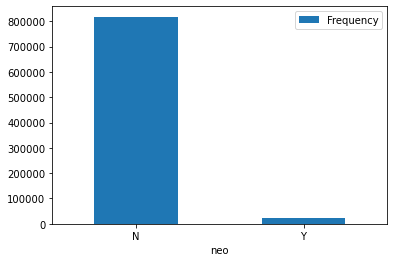

In [17]:
neo = dataset['neo'].value_counts()
neo = pd.DataFrame({"Frequency":neo})
neo['neo'] = neo.index
neo.plot.bar(x='neo', y='Frequency', rot=0)
plt.show()

Majority values are 'N'

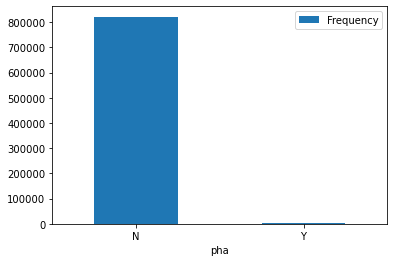

In [18]:
pha = dataset['pha'].value_counts()
pha = pd.DataFrame({"Frequency":pha})
pha['pha'] = pha.index
pha.plot.bar(x='pha', y='Frequency', rot=0)
plt.show()

'Y' is almost nil as compared to 'N'

<Figure size 864x576 with 0 Axes>

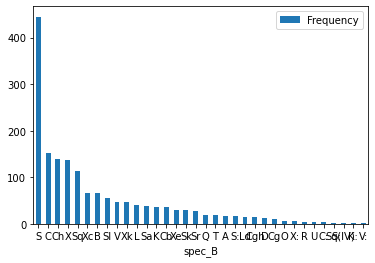

In [19]:
plt.figure(figsize=(12, 8))
spec_B = dataset['spec_B'].value_counts()
spec_B = pd.DataFrame({"Frequency":spec_B})
spec_B['spec_B'] = spec_B.index
spec_B.plot.bar(x='spec_B', y='Frequency', rot=0)
plt.show()

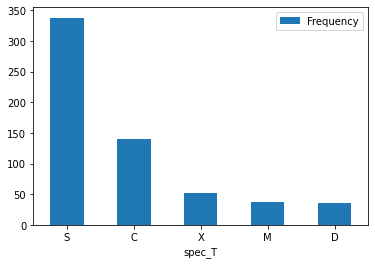

In [20]:
spec_T = dataset['spec_T'].value_counts()[:5]
spec_T = pd.DataFrame({"Frequency":spec_T})
spec_T['spec_T'] = spec_T.index
spec_T.plot.bar(x='spec_T', y='Frequency', rot=0)
plt.show()

## Bivariate Feature Analysis 

### Bivariate Analysis for Numeric Data 

Finding Correlation between features using heatmap and some functions

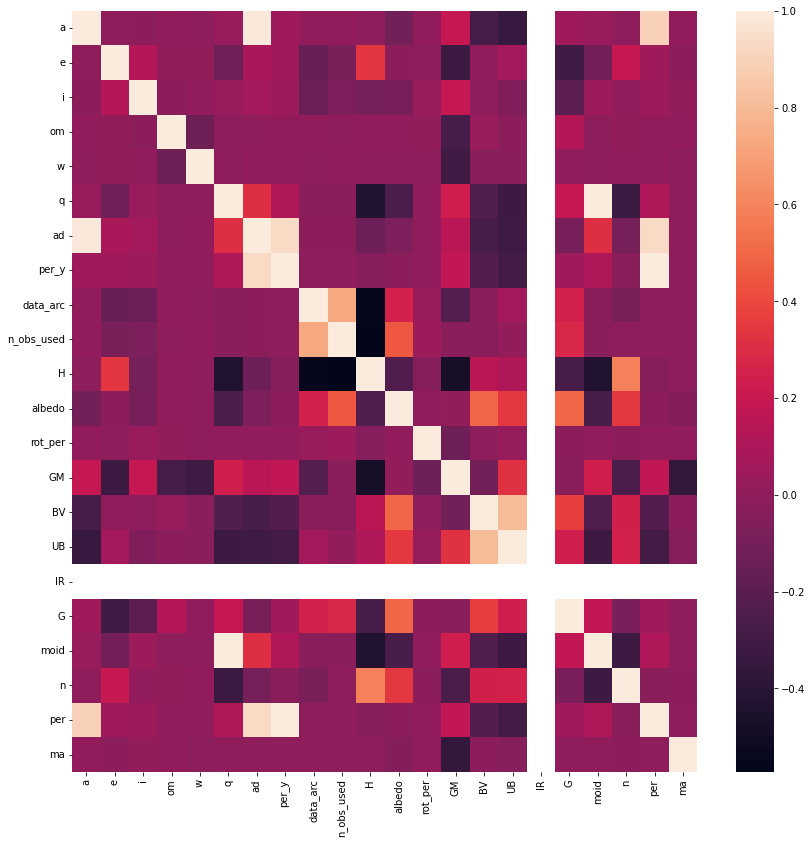

In [21]:
# A Heatmap is a two-dimensional graphical representation of data
# where the individual values that are contained in a matrix are represented as colors.
plt.figure(figsize=(14,14)) # customize the plot
sns.heatmap(dataset.corr()) # exploring correlation between the attributes of data
plt.show()

In [22]:
num_corr = {}

The correlation matrix can be used to estimate the linear historical relationship between the returns of multiple assets.

we can use built-in .corr() method on a pandas dataframe to easily calculate the correlation matrix.

In [23]:
# A correlation matrix is simply a table which dispays the correlation.
# This measure is used to demonstrate a linear relationship between two variables.
# Here we used corr_max() function to find maximum/heavy correlations between features.

def corr_max(feature):
    dicto = dict(dataset.corrwith(dataset[feature]))
    
    for key, val in dicto.items():
        if (val > 0.97 or val < -0.97) and (feature != key):
            num_corr[feature] = key
            print(feature, "------>", key)

In [24]:
# Prints columns with maximum correlation
print("Heavy Correlation is between: ")
for col in numeric:
    corr_max(col)

Heavy Correlation is between: 
a ------> ad
q ------> moid
ad ------> a
per_y ------> per
moid ------> q
per ------> per_y


Outcome: features are found to be havily correlated with pearson coefficient greater than 0.97 or less than -0.97

Pearson Correlation Coefficient: is a measure of linear correlation between two sets of data. 

It is the ratio between the covariance of two variables and the product of their standard deviations; thus it is essentially a normalised measurement of the covariance, such that the result always has a value between −1 and 1.

## Bivariate Analysis of Categorical Data 

Bivariate Analysis invloves the analysis of two variables, for the purpose of determining the empirical relationship between them.

### Chi-Squared Test for relationship between categorical data 

A Chi-squared test (also chi-square or χ2 test) is a statistical hypothesis test that is valid to perform  when the test statistic is chi-squared distributed under null hypothesis(no difference between two possibilities).

In [25]:
# Categorical data
print(" Categorical Data :", categorical)

 Categorical Data : ['name', 'condition_code', 'neo', 'pha', 'extent', 'spec_B', 'spec_T', 'class']


The method .copy() is used here so that any changes made in new DataFrame don't get reflected in the original one.

In [26]:
# categories for correlation test
# this .copy() method returns the name of categories for correlation test
test_corr_cat = categorical.copy()
test_corr_cat.remove('name')
print('categories for correlation test :', test_corr_cat)

categories for correlation test : ['condition_code', 'neo', 'pha', 'extent', 'spec_B', 'spec_T', 'class']


In [27]:
cat_corr = {}

In [28]:
# (Scipy function)chi2_contingency: comparison of two groups with dichotomous dependant variable
# to determine whether there is statistically significant difference between expected and observed frequencies in one or
# more categories of contingency table.

# crosstab: a table showing relationship between two or more variables
def cat_correlation(feature1, feature2):
    crosstab = pd.crosstab(dataset[feature1], dataset[feature2])
    p_value = stats.chi2_contingency(crosstab)[1]
    
    if p_value < 0.05:
        cat_corr[feature1] = feature2
        print(feature1, "is Related to ", feature2, "with p-value :", p_value)

In [29]:
for ind1 in range(len(test_corr_cat)):
    for ind2 in range(ind1+1, len(test_corr_cat)):
        cat_correlation(test_corr_cat[ind1], test_corr_cat[ind2])

condition_code is Related to  neo with p-value : 0.0
condition_code is Related to  pha with p-value : 1.0312155367979149e-199
condition_code is Related to  spec_B with p-value : 1.5849916756916413e-96
condition_code is Related to  spec_T with p-value : 2.8792242695344553e-43
condition_code is Related to  class with p-value : 0.0
neo is Related to  pha with p-value : 0.0
neo is Related to  spec_B with p-value : 1.0784031329999345e-66
neo is Related to  spec_T with p-value : 1.0549449724674979e-13
neo is Related to  class with p-value : 0.0
pha is Related to  spec_B with p-value : 1.3109230338722967e-22
pha is Related to  spec_T with p-value : 9.1499734851376e-05
pha is Related to  class with p-value : 0.0
spec_B is Related to  spec_T with p-value : 1.331145733430803e-216
spec_B is Related to  class with p-value : 2.0145187772655847e-99
spec_T is Related to  class with p-value : 4.3217214624777004e-72


### Handling missing values 

One of the most common data pre-processing steps is to checek for null values in the dataset. we can get the total number of msiing values in the dataframe by the following line of code. 

In [30]:
dataset = dataset[pd.notnull(dataset['diameter'])]
dataset = dataset[pd.notnull(dataset['albedo'])]
dataset['data_arc'].fillna(1,inplace=True)

dataset.isnull().sum()

name              121302
a                      0
e                      0
i                      0
om                     0
w                      0
q                      0
ad                     0
per_y                  0
data_arc               0
condition_code         0
n_obs_used             0
H                    273
neo                    0
pha                    0
diameter               0
extent            136394
albedo                 0
rot_per           125252
GM                136394
BV                135408
UB                135448
IR                136405
spec_B            135048
spec_T            135448
G                 136289
moid                   0
class                  0
n                      0
per                    0
ma                     0
dtype: int64

### Treating Categorical missing values 

In [31]:
# Categorical Missing Values
# returns Nan values for categorical features
for feature in categorical:
    missing = dataset[feature].isnull().sum()
    if missing > 0:
        print(feature, "---->", missing)

name ----> 121302
extent ----> 136394
spec_B ----> 135048
spec_T ----> 135448


In [32]:
# categories with more NaN values than Non-NaN values
# calculating the percentage of NaN values in categorical features
remove_cat = []
max_len = dataset.shape[0]

for ele in categorical:
    null = len(dataset[ele][dataset[ele].isnull()==True])
    not_null = len(dataset[ele][dataset[ele].isnull()==False])
    
    if null > not_null:
        print("Percentage of NaN values for", ele, " : ", null*100//max_len, "%")
        remove_cat.append(ele)    

Percentage of NaN values for name  :  88 %
Percentage of NaN values for extent  :  99 %
Percentage of NaN values for spec_B  :  99 %
Percentage of NaN values for spec_T  :  99 %


In [33]:
dataset.drop(remove_cat, axis=1, inplace=True)

Let's also check the column-wise distribution of null values:

In [34]:
# Filing missing values of remaining categories with mode
dataset['condition_code'].fillna(dataset['condition_code'].mode()[0], inplace=True)
dataset['neo'].fillna(dataset['neo'].mode()[0], inplace=True)
dataset['pha'].fillna(dataset['pha'].mode()[0], inplace=True)

### Treating Numeric Missing values 

In [35]:
# numeric missing values

missing_num = []
for feature in numeric:
    missing = dataset[feature].isnull().sum()
    if missing > 0:
        print(feature, "---->", missing)
        missing_num.append(feature)

H ----> 273
rot_per ----> 125252
GM ----> 136394
BV ----> 135408
UB ----> 135448
IR ----> 136405
G ----> 136289


In [36]:
# Numeric with more NaN values than Non-NaN values

remove_num = []
max_len = dataset.shape[0]

for ele in numeric:
    null = len(dataset[ele][dataset[ele].isnull()==True])
    not_null = len(dataset[ele][dataset[ele].isnull()==False])
    
    if null > not_null:
        print("Percentage of NaN values for", ele, " : ", null*100//max_len, "%")
        remove_num.append(ele)    

Percentage of NaN values for rot_per  :  91 %
Percentage of NaN values for GM  :  99 %
Percentage of NaN values for BV  :  99 %
Percentage of NaN values for UB  :  99 %
Percentage of NaN values for IR  :  99 %
Percentage of NaN values for G  :  99 %


In [37]:
dataset.loc[:, dataset. columns != 'albedo']

,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,neo,pha,diameter,rot_per,GM,BV,UB,IR,G,moid,class,n,per,ma
0,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,0,1002,3.34,N,N,939.4,9.074170,62.6284,0.713,0.426,NaN,0.12,1.594780,MBA,0.213885,1683.145708,77.372096
1,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,0,8490,4.13,N,N,545,7.813200,14.3000,0.635,0.284,NaN,0.11,1.233240,MBA,0.213503,1686.155999,59.699133
2,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,0,7104,5.33,N,N,246.596,7.210000,NaN,0.824,0.433,NaN,0.32,1.034540,MBA,0.226019,1592.787285,34.925016
3,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,0,9325,3.20,N,N,525.4,5.342128,17.8000,0.782,0.492,NaN,0.32,1.139480,MBA,0.271609,1325.432765,95.861936
4,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,0,2916,6.85,N,N,106.699,16.806000,NaN,0.826,0.411,NaN,NaN,1.095890,MBA,0.238632,1508.600458,282.366289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797835,3.155975,0.430349,28.718353,115.532995,136.849398,1.797805,4.514145,5.606716,2250.0,2,47,18.20,N,N,1.077,NaN,NaN,NaN,NaN,NaN,NaN,0.854315,MBA,0.175794,2047.852953,195.737632
797860,3.171225,0.159119,27.098625,309.036573,19.746812,2.666623,3.675826,5.647402,2373.0,1,50,16.20,N,N,3.793,NaN,NaN,NaN,NaN,NaN,NaN,1.663010,MBA,0.174527,2062.713583,164.999439
798077,2.548410,0.076071,11.593237,246.298656,170.090810,2.354549,2.742270,4.068291,3297.0,2,33,17.30,N,N,2.696,NaN,NaN,NaN,NaN,NaN,NaN,1.367330,MBA,0.242270,1485.943371,145.319581
799752,3.051336,0.287449,14.456779,343.917822,342.614839,2.174231,3.928440,5.330196,2208.0,2,27,17.20,N,N,3.271,NaN,NaN,NaN,NaN,NaN,NaN,1.166840,MBA,0.184914,1946.853973,175.708508


In [38]:
dataset.drop(remove_num, axis=1, inplace=True)

In [39]:
remain_miss_num = [x for x in missing_num if x not in remove_num]
print("Remaining Row with missing values", remain_miss_num)

Remaining Row with missing values ['H']


In [40]:
dataset['data_arc'].value_counts()[:10]

1.0        4036
2.0        1658
7150.0      143
7626.0      142
7623.0      128
           ... 
10268.0      11
5862.0       11
7886.0       11
6571.0       11
10.0         11
Name: data_arc, Length: 3465, dtype: int64

In [41]:
dataset['H'].value_counts()[:10]

15.2    4619
15.4    4526
15.5    4511
15.3    4472
15.1    4455
        ... 
10.6      46
10.1      42
10.4      41
10.5      41
10.0      40
Name: H, Length: 85, dtype: int64

Some values are very common in 'data_arc' and 'H' so treat the missing values of this two columns with mean of the 10 most occuring values.

### Filling(replacing) Missing Values 

Use the mean to fill the values.

In [42]:
def fill_na(feature):
    dataset[feature].fillna(dataset[feature].mean(), inplace=True)        

In [43]:
for ele in remain_miss_num:
    if ele not in ['data_arc', 'H', 'albedo']:
        fill_na(ele)

In [64]:
# Top 10 most occuring values of feature 'data_arc'
most_data_arc = dict(dataset['data_arc'].value_counts()[:10])
print("Top 10 most occuring values of feature 'data_arc' : ", most_data_arc.keys())

Top 10 most occuring values of feature 'data_arc' :  dict_keys([1.0, 2.0, 7150.0, 7626.0, 7623.0, 5.0, 21586.0, 7175.0, 7625.0, 4.0, 7179.0, 8037.0, 7149.0, 7151.0, 7146.0, 7148.0, 7173.0, 7624.0, 6735.0, 7147.0, 21413.0, 7708.0, 6765.0, 7176.0, 7621.0, 6736.0, 7174.0, 7181.0, 8036.0, 7180.0, 7177.0, 7154.0, 7656.0, 7566.0, 7116.0, 7152.0, 7118.0, 6761.0, 6737.0, 7182.0, 7560.0, 6792.0, 7144.0, 6794.0, 7743.0, 6795.0, 7120.0, 7142.0, 7155.0, 7178.0, 7562.0, 7233.0, 7622.0, 7143.0, 7529.0, 7183.0, 7153.0, 7647.0, 7659.0, 6791.0, 6796.0, 6766.0, 7618.0, 6762.0, 7617.0, 7145.0, 6260.0, 7530.0, 7211.0, 6294.0, 7207.0, 7619.0, 7595.0, 8006.0, 7125.0, 7690.0, 6732.0, 7651.0, 6764.0, 7745.0, 7710.0, 6789.0, 7113.0, 7681.0, 6323.0, 6289.0, 7141.0, 7208.0, 7655.0, 7591.0, 6760.0, 7170.0, 7206.0, 7717.0, 6733.0, 6758.0, 7653.0, 7657.0, 6731.0, 7528.0, 7706.0, 6763.0, 7268.0, 6231.0, 6705.0, 6800.0, 7172.0, 6798.0, 7119.0, 6237.0, 7124.0, 6672.0, 17753.0, 6739.0, 7126.0, 7650.0, 7567.0, 7616.0, 7

In [45]:
mean = sum(list(most_data_arc.keys())) // 10
dataset['data_arc'].fillna(mean, inplace=True)

In [46]:
# Top 10 most occuring values of feature 'data_arc'
H_list = list(dict(dataset['H'].value_counts().sort_values(ascending=False)).keys())
print("Top 10 most occuring values of feature 'data_arc' : ", H_list[:10])

Top 10 most occuring values of feature 'data_arc' :  [15.2, 15.4, 15.5, 15.3, 15.1, 15.7, 15.6, 14.9, 15.0, 15.9]


In [47]:
mean_H = sum(H_list[:10])//10
dataset['H'].fillna(mean_H, inplace=True)

In [48]:
dataset.isnull().sum()

a                 0
e                 0
i                 0
om                0
w                 0
q                 0
ad                0
per_y             0
data_arc          0
condition_code    0
n_obs_used        0
H                 0
neo               0
pha               0
diameter          0
albedo            0
moid              0
class             0
n                 0
per               0
ma                0
dtype: int64

As 'diameter' is target variable its missing values needs to be dropped

In [49]:
# Print's count of all Non-Null values in target variable and percentage of missing values of target variables
print('Number of Non-Null values in diameter :-> ', len(dataset['diameter'][dataset['diameter'].isnull() == False]))
print('Number of Null values in diameter :-> ', len(dataset['diameter'][dataset['diameter'].isnull() == True]))
print("Percentage of missing values in target variable : ", round(len(dataset['diameter'][dataset['diameter'].isnull() == True])*100/max_len), "%")

Number of Non-Null values in diameter :->  136406
Number of Null values in diameter :->  0
Percentage of missing values in target variable :  0 %


### Drop labels with mising values

To exclude columns or rows that contain missing values, we can make use pandas dropna() function.

In [50]:
# dropna() function is used to remove rows and columns with Null/NaN values
clean_dataset = dataset.dropna()
clean_dataset.head()

,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,neo,pha,diameter,albedo,moid,class,n,per,ma
0,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,0,1002,3.34,N,N,939.4,0.0900,1.59478,MBA,0.213885,1683.145708,77.372096
1,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,0,8490,4.13,N,N,545,0.1010,1.23324,MBA,0.213503,1686.155999,59.699133
2,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,0,7104,5.33,N,N,246.596,0.2140,1.03454,MBA,0.226019,1592.787285,34.925016
3,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,0,9325,3.20,N,N,525.4,0.4228,1.13948,MBA,0.271609,1325.432765,95.861936
4,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,0,2916,6.85,N,N,106.699,0.2740,1.09589,MBA,0.238632,1508.600458,282.366289


In [51]:
clean_dataset.shape

(136406, 21)

In [52]:
# Converting 'diameter' to continuous datatype
clean_dataset['Diameter'] = clean_dataset['diameter'].apply(lambda x: float(x))

In [53]:
# axis = 1 --> columns
clean_dataset.drop('diameter', axis=1, inplace=True) #drops 'diameter' column from clean_dataset

In [54]:
dataset.drop(['condition_code', 'neo', 'pha','n_obs_used', 'data_arc', 'class'], axis = 1)

,a,e,i,om,w,q,ad,per_y,H,diameter,albedo,moid,n,per,ma
0,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,3.34,939.4,0.0900,1.594780,0.213885,1683.145708,77.372096
1,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,4.13,545,0.1010,1.233240,0.213503,1686.155999,59.699133
2,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,5.33,246.596,0.2140,1.034540,0.226019,1592.787285,34.925016
3,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,3.20,525.4,0.4228,1.139480,0.271609,1325.432765,95.861936
4,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,6.85,106.699,0.2740,1.095890,0.238632,1508.600458,282.366289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797835,3.155975,0.430349,28.718353,115.532995,136.849398,1.797805,4.514145,5.606716,18.20,1.077,0.1160,0.854315,0.175794,2047.852953,195.737632
797860,3.171225,0.159119,27.098625,309.036573,19.746812,2.666623,3.675826,5.647402,16.20,3.793,0.0210,1.663010,0.174527,2062.713583,164.999439
798077,2.548410,0.076071,11.593237,246.298656,170.090810,2.354549,2.742270,4.068291,17.30,2.696,0.0610,1.367330,0.242270,1485.943371,145.319581
799752,3.051336,0.287449,14.456779,343.917822,342.614839,2.174231,3.928440,5.330196,17.20,3.271,0.0720,1.166840,0.184914,1946.853973,175.708508


In [55]:
# clean_dataset columns
clean_dataset.columns

Index(['a', 'e', 'i', 'om', 'w', 'q', 'ad', 'per_y', 'data_arc',
       'condition_code', 'n_obs_used', 'H', 'neo', 'pha', 'albedo', 'moid',
       'class', 'n', 'per', 'ma', 'Diameter'],
      dtype='object')

## Outlier Detection

Outliers are extreme values that deviate from other observations on data.

### detecting Outlier using Box Plot

Box plot is a method for graphically demonstrating the locality, spread and skewness groups of numerical data through their quartiles.

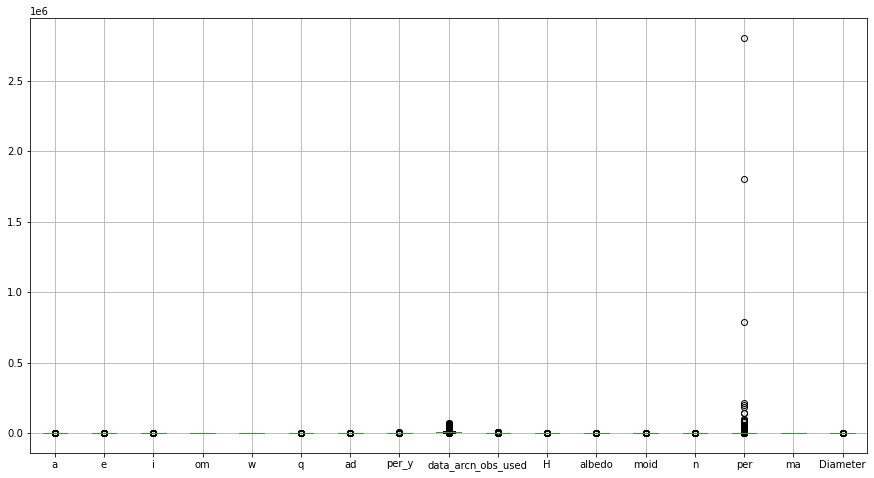

In [56]:
# plotting Box-plot to detect outliers
plt.figure(figsize=(15, 8)) # customize the data
clean_dataset.boxplot()
plt.show()

The feature 'per' contains very large outliers

### Detecting Outlier using Z-Score  

Z score is also called standard score.

This score helps to understand if a data value is greater or smaller than mean and how far away it is from the mean. More specially, Z score tells how many standard deviations away a data point is from the mean.

Z score = (x - mean) / std.deviation

In [57]:
outliers = []
def detect_outliers(data):
    
    threshold = 4
    mean = np.mean(data) # compute mean of data
    std = np.std(data) # compute standard deviation of data
    
    for i in data:
        # compute z_score --> z = ((x - mu) / σ)
        z_score = (i - mean) / std
        if np.abs(z_score) > threshold: # threshold = Q3 + 1.5 * IQR
            outliers.append(i)
    return outliers

In [58]:
num_data = [] # array of numeric data
for ele in clean_dataset.columns:
    if clean_dataset[ele].dtype != 'object':
        num_data.append(ele)
print("Numeric Data :--> ", num_data)

Numeric Data :-->  ['a', 'e', 'i', 'om', 'w', 'q', 'ad', 'per_y', 'data_arc', 'n_obs_used', 'H', 'albedo', 'moid', 'n', 'per', 'ma', 'Diameter']


In [59]:
# Number of outliers from each section
for ele in num_data:
    outlier = detect_outliers(clean_dataset[ele])
    if len(outlier) > 0:
        print("Numer of outliers for", ele, "-->", len(outlier))

Numer of outliers for a --> 50
Numer of outliers for e --> 625
Numer of outliers for i --> 770
Numer of outliers for om --> 770
Numer of outliers for w --> 770
Numer of outliers for q --> 2601
Numer of outliers for ad --> 2650
Numer of outliers for per_y --> 2670
Numer of outliers for data_arc --> 4040
Numer of outliers for n_obs_used --> 4232
Numer of outliers for H --> 4987
Numer of outliers for albedo --> 5459
Numer of outliers for moid --> 7262
Numer of outliers for n --> 7653
Numer of outliers for per --> 7673
Numer of outliers for ma --> 7673
Numer of outliers for Diameter --> 8581


## Detecting and treating outlier using IQR 

IQR is used to measure variabilty by dividing a data set into quartiles.

The data is sorted in ascending order and split into 4 equal parts. Q1, q2, Q3 called first, second and third quartiles are the values which separate the 4 equal parts.

Q1 represents the 25th percentile of the data.

Q2 represnts the 50th percentile of the data.

Q3 represents the 75th percentile of the data.

In [60]:
# Replace the outlier value using the IQR
# Function to find upper and lower limit
def outlier_limits(col):
    Q3, Q1 = np.percentile(col, [75, 25]) # upper and lower limits
    IQR = Q3 - Q1 # Interquartile range 
    UL = Q3 + 1.5 * IQR # upper limit
    LL = Q1 - 1.5 * IQR # Lower limit
    return UL, LL

## Treating outliers using capping method 

Capping: In this technique, we cap the outliers data and make the limit i.e, above a particular value or less than that value, all the values willa be considered as outliers, and the numebr of outliers in the dataset gives that capping number.

In [61]:
new_df = pd.DataFrame()

In [62]:
for ele in num_data:
    UL, LL = outlier_limits(clean_dataset[ele])
    print(ele, "-->", "Lower Limit : ", round(LL), " | ", "Upper Limit :", round(UL)) # print UL and LL variable
    clean_dataset[ele] = np.where(clean_dataset[ele]>UL,
                                 UL, np.where
                                 (clean_dataset[ele]<LL,
                                 LL, clean_dataset[ele]))

a --> Lower Limit :  2  |  Upper Limit : 4
e --> Lower Limit :  0  |  Upper Limit : 0
i --> Lower Limit :  -8  |  Upper Limit : 27
om --> Lower Limit :  -179  |  Upper Limit : 517
w --> Lower Limit :  -178  |  Upper Limit : 541
q --> Lower Limit :  1  |  Upper Limit : 4
ad --> Lower Limit :  2  |  Upper Limit : 4
per_y --> Lower Limit :  2  |  Upper Limit : 8
data_arc --> Lower Limit :  1128  |  Upper Limit : 14948
n_obs_used --> Lower Limit :  -935  |  Upper Limit : 2145
H --> Lower Limit :  12  |  Upper Limit : 19
albedo --> Lower Limit :  0  |  Upper Limit : 0
moid --> Lower Limit :  0  |  Upper Limit : 3
n --> Lower Limit :  0  |  Upper Limit : 0
per --> Lower Limit :  711  |  Upper Limit : 2751
ma --> Lower Limit :  -171  |  Upper Limit : 537
Diameter --> Lower Limit :  -2  |  Upper Limit : 10


In [63]:
# save the Clean Dataset
clean_dataset.to_csv('Clean_Dataset.csv')